In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("D:/Workspace/ML_ALGO/image_classification/model/test_images/image_14.jpeg")
img.shape

(251, 201, 3)

here the shape is of 3 dimensional
as the first is x second is y and third one is indicating the rgb

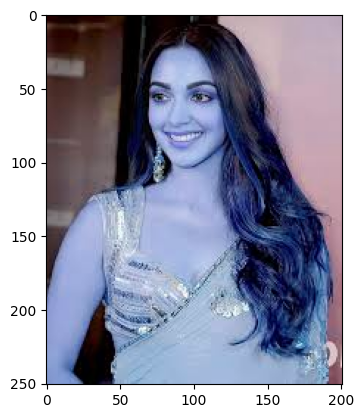

In [3]:
plt.imshow(img)

In [4]:
# converting colorful image to gray image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(251, 201)

In [5]:
gray

array([[  5,   5,   4, ..., 177, 176, 178],
       [  5,   4,   5, ..., 177, 176, 178],
       [  4,   4,   5, ..., 177, 176, 178],
       ...,
       [162, 163, 164, ...,  95, 103, 108],
       [162, 163, 164, ...,  95, 103, 108],
       [162, 163, 164, ...,  95, 103, 107]], dtype=uint8)

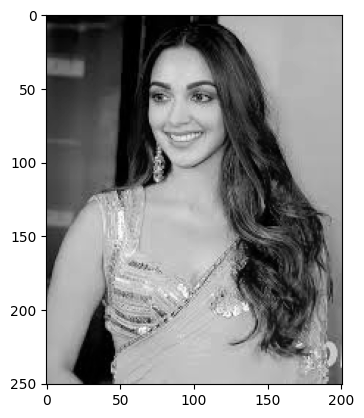

In [6]:
plt.imshow(gray, cmap= 'gray')

In [7]:
face_cascade = cv2.CascadeClassifier("D:/Workspace/ML_ALGO/image_classification/model/opencv/haarcascade/haarcascade_frontalface_default.xml")

eyes_cascade = cv2.CascadeClassifier("D:/Workspace/ML_ALGO/image_classification/model/opencv/haarcascade/haarcascade_eye.xml")


faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces


array([[58, 30, 68, 68]])

the given shap is nothing but x, y, width, height

In [8]:
(x,y,w, h) = faces[0]

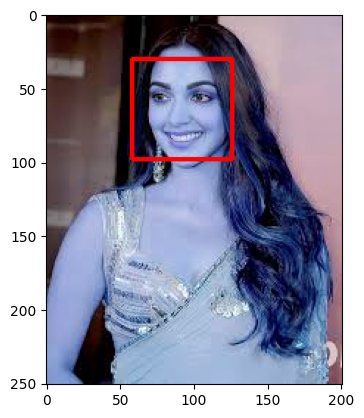

In [9]:
face_img = cv2.rectangle(img, (x,y),(x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

this is howing the face in rectangle shape 

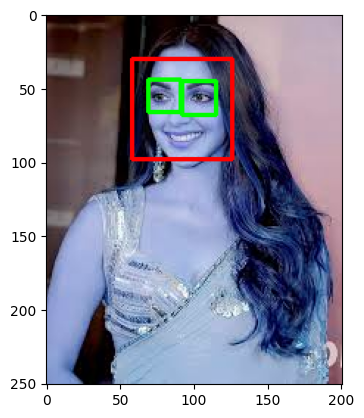

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y),(x+w, y+h), (255, 0, 0), 2)
    roy_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eyes_cascade.detectMultiScale(roy_gray)

    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255,0), 2)

plt.figure()
plt.imshow(face_img, cmap = "gray")
plt.show()

In [11]:
plt.imshow(roi_color, cmap = "gray")
%matplotlib inline

In [12]:
#get cropped image if both the eyes visible

def get_crop_img_both_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eyes_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color


def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eyes_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

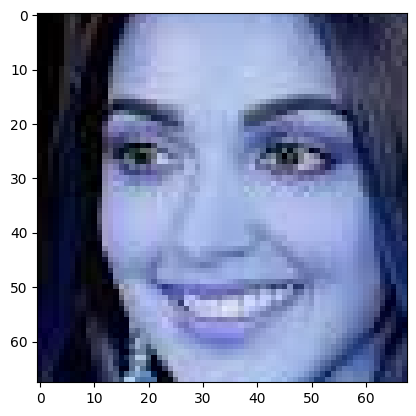

In [13]:
cropped_image = get_crop_img_both_eyes("D:/Workspace/ML_ALGO/image_classification/model/test_images/image_14.jpeg")
plt.imshow(cropped_image)

In [47]:
path_to_data = "D:/Workspace/ML_ALGO/image_classification/model/dataset/"
path_to_cir_data = "D:/Workspace/ML_ALGO/image_classification/model/cropped_dataset/"

In [52]:
import os
img_dirs = []

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['D:/Workspace/ML_ALGO/image_classification/model/dataset/kiara_advani',
 'D:/Workspace/ML_ALGO/image_classification/model/dataset/kohli',
 'D:/Workspace/ML_ALGO/image_classification/model/dataset/maria',
 'D:/Workspace/ML_ALGO/image_classification/model/dataset/messi',
 'D:/Workspace/ML_ALGO/image_classification/model/dataset/rodger',
 'D:/Workspace/ML_ALGO/image_classification/model/dataset/selena']

In [53]:
import shutil
if os.path.exists(path_to_cir_data):
    shutil.rmtree(path_to_cir_data)

os.makedirs(path_to_cir_data)

In [54]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_crop_img_both_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cir_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  D:/Workspace/ML_ALGO/image_classification/model/cropped_dataset/kiara_advani
Generating cropped images in folder:  D:/Workspace/ML_ALGO/image_classification/model/cropped_dataset/kohli
Generating cropped images in folder:  D:/Workspace/ML_ALGO/image_classification/model/cropped_dataset/maria
Generating cropped images in folder:  D:/Workspace/ML_ALGO/image_classification/model/cropped_dataset/messi
Generating cropped images in folder:  D:/Workspace/ML_ALGO/image_classification/model/cropped_dataset/rodger
Generating cropped images in folder:  D:/Workspace/ML_ALGO/image_classification/model/cropped_dataset/selena


In [55]:
import numpy as np
import pywt
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H =  np.uint8(imArray_H)

    return imArray_H


In [56]:
celebrity_file_names_dict

{'kiara_advani': ['D:/Workspace/ML_ALGO/image_classification/model/cropped_dataset/kiara_advani/kiara_advani1.png',
  'D:/Workspace/ML_ALGO/image_classification/model/cropped_dataset/kiara_advani/kiara_advani2.png',
  'D:/Workspace/ML_ALGO/image_classification/model/cropped_dataset/kiara_advani/kiara_advani3.png',
  'D:/Workspace/ML_ALGO/image_classification/model/cropped_dataset/kiara_advani/kiara_advani4.png',
  'D:/Workspace/ML_ALGO/image_classification/model/cropped_dataset/kiara_advani/kiara_advani5.png',
  'D:/Workspace/ML_ALGO/image_classification/model/cropped_dataset/kiara_advani/kiara_advani6.png',
  'D:/Workspace/ML_ALGO/image_classification/model/cropped_dataset/kiara_advani/kiara_advani7.png',
  'D:/Workspace/ML_ALGO/image_classification/model/cropped_dataset/kiara_advani/kiara_advani8.png',
  'D:/Workspace/ML_ALGO/image_classification/model/cropped_dataset/kiara_advani/kiara_advani9.png',
  'D:/Workspace/ML_ALGO/image_classification/model/cropped_dataset/kiara_advani/kiar

In [57]:
celeb_class = {}
c = 0
for celb in celebrity_file_names_dict.keys():
    celeb_class[celb] = c
    c +=1
celeb_class

{'kiara_advani': 0,
 'kohli': 1,
 'maria': 2,
 'messi': 3,
 'rodger': 4,
 'selena': 5}

In [58]:
x, y = [], []

for celb_name, training_file in celebrity_file_names_dict.items():
    for training_img in training_file:
        img = cv2.imread(training_img)
        if img is None: # used this as i had manually deleted few phtos as if they weren't belong to the celb
            continue
        scaled_raw_img = cv2.resize(img, (32, 32))
        img_haar = w2d(img, 'db1', 5)
        scaled_img_haar = cv2.resize(img_haar, (32, 32))
        # combined_img = np.vstack((scaled_raw_img.reshape(32*32*3, 1), scaled_img_haar.reshape(32*32, 1)))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_haar.reshape(32*32,1)))
        x.append(combined_img)
        y.append(celeb_class[celb_name])  


In [59]:
len(x)

197

In [60]:
len(x[0])

4096

In [61]:
x[0]

array([[  0],
       [  0],
       [  0],
       ...,
       [145],
       [ 52],
       [110]], dtype=uint8)

In [62]:
x = np.array(x).reshape(len(x), 4096).astype(float)

In [63]:
x.shape

(197, 4096)

In [27]:
x

array([[  0.,   0.,   0., ..., 145.,  52., 110.],
       [ 78.,  92., 128., ...,  76., 184., 189.],
       [ 11.,  11.,  22., ..., 109.,  11.,  77.],
       ...,
       [ 11.,  10.,  14., ..., 184.,  19., 251.],
       [ 19.,  27.,  47., ...,  43.,   0.,   0.],
       [ 81.,  77.,  83., ...,  11.,   2.,   5.]])

In [28]:
len(y)

197

Model Training

In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C = 5))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.64

In [66]:
len(x_test), len(x_train)

(50, 147)

In [67]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.57      0.80      0.67        10
           2       0.46      0.75      0.57         8
           3       0.88      0.70      0.78        10
           4       0.83      0.62      0.71         8
           5       0.62      0.50      0.56        10

    accuracy                           0.64        50
   macro avg       0.73      0.60      0.61        50
weighted avg       0.70      0.64      0.64        50



Pickup The Best Model using GridSearchCV

In [68]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

models = {
    'svm' : {
        'model' : SVC(gamma='auto', probability= True),
        'params' : {
            'svc__C' : [1, 10, 100],
            'svc__kernel' : ['rbf', 'linear']
        }
    },

    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators' : [1, 5, 10]
        }
    },

    'logistic_reg' : {
        'model' : LogisticRegression(solver='liblinear', multi_class= "auto"),
        'params' : {
            "logisticregression__C" : [1, 5, 10]
        }
    }
}

In [69]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in models.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.774943,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.625747,{'randomforestclassifier__n_estimators': 10}
2,logistic_reg,0.782299,{'logisticregression__C': 1}


In [70]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_reg': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [71]:
best_estimators['svm'].score(x_test, y_test)

0.72

In [72]:
best_estimators['random_forest'].score(x_test, y_test)

0.56

In [73]:
best_estimators['logistic_reg'].score(x_test, y_test)

0.76

Model SAVE

In [74]:
best_clf = best_estimators['svm']

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[2, 0, 0, 1, 1, 0],
       [0, 7, 1, 1, 1, 0],
       [0, 0, 6, 0, 1, 1],
       [0, 2, 0, 8, 0, 0],
       [0, 0, 0, 0, 7, 1],
       [0, 1, 3, 0, 0, 6]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

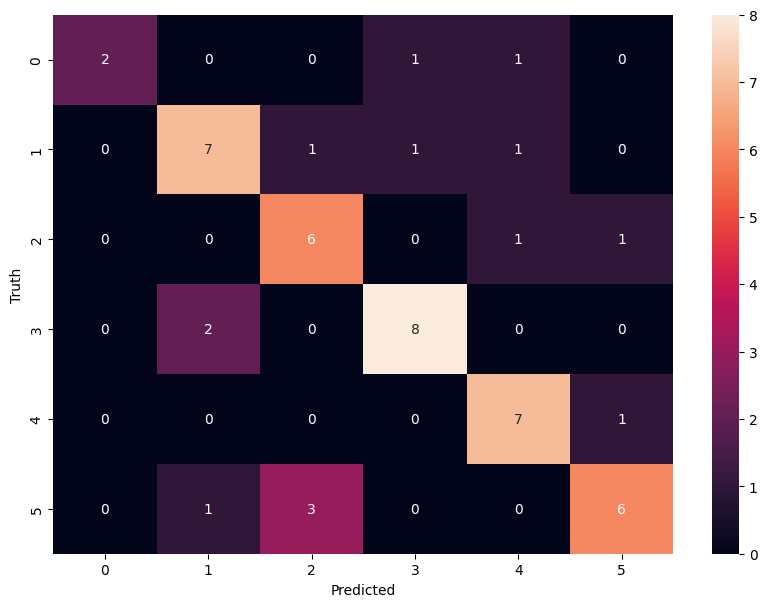

In [76]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [77]:
celeb_class

{'kiara_advani': 0,
 'kohli': 1,
 'maria': 2,
 'messi': 3,
 'rodger': 4,
 'selena': 5}

Save the trained model

In [78]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

save class dictionary of celeberity

In [79]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(celeb_class))